In [44]:
!pip install plotly
!pip install nbformat>=4.2.0
!pip install --upgrade nbformat
!pip install bokeh

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import nbformat
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

Загрузка данных 

EDA

Preprocessing

item_categories.csv - дополнительная информация о категориях товаров

In [2]:
data_i_cat=pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')

item_category_name - название категории товара

item_category_id - уникальный идентификатор категории товара

In [3]:
data_i_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [4]:
data_i_cat['item_category_name'].count()

84

In [5]:
# Новый столбец "item_category" с запятой в виде разделителя, вместо тире
data_i_cat['item_category']=data_i_cat['item_category_name'].str.split('-')

In [6]:
# Новые столбцы отдельно с категорией и товаром 
data_i_cat['category']=data_i_cat['item_category'].apply(lambda x: x[0].strip())
data_i_cat['item'] = data_i_cat['item_category'].apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [7]:
# Удаление ненужных столбцов
data_i_cat.drop(['item_category_name','item_category'], inplace=True, axis=1)

In [8]:
data_i_cat.head()

,item_category_id,category,item
0,0,PC,Гарнитуры/Наушники
1,1,Аксессуары,PS2
2,2,Аксессуары,PS3
3,3,Аксессуары,PS4
4,4,Аксессуары,PSP


In [9]:
# Уникальное количество категорий и товаров
print("Unique categories: ",data_i_cat['category'].nunique())
print("Unique items: ",data_i_cat['item'].nunique())

Unique categories:  20
Unique items:  65


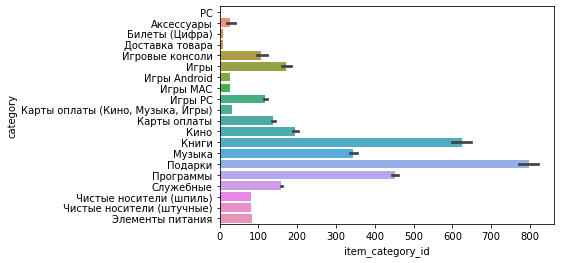

In [10]:
ax = sns.barplot(x='item_category_id', y='category', data=data_i_cat, estimator=np.sum)

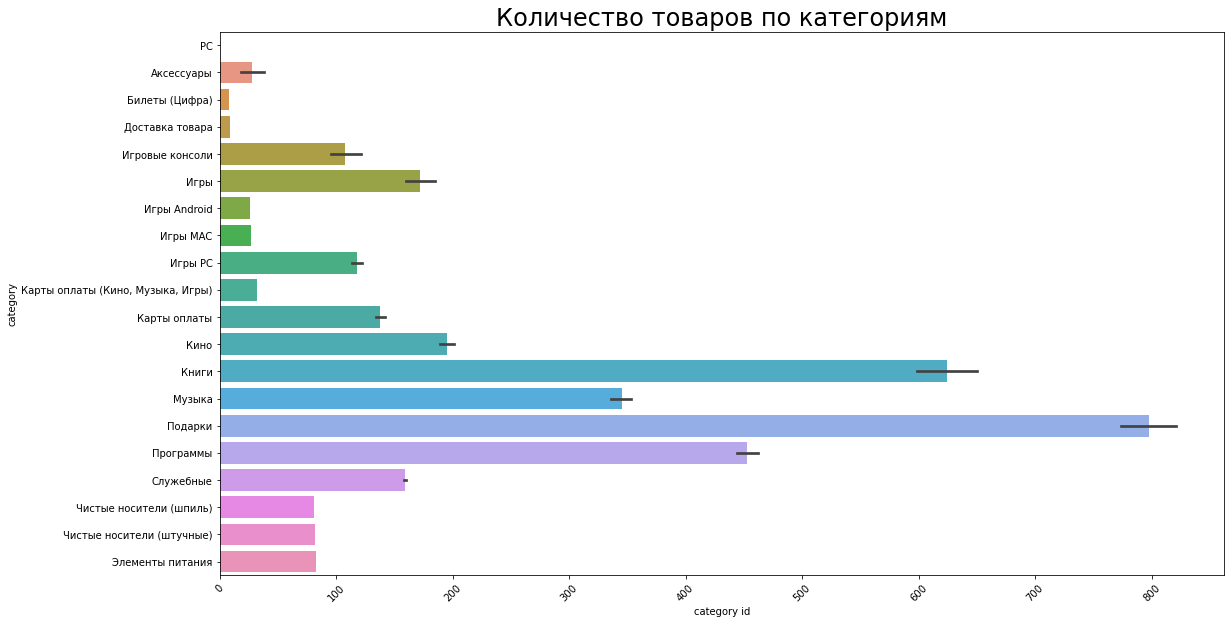

In [11]:
# График количества товаров по категориям
plt.figure(figsize = (18,10))
plt.title('Количество товаров по категориям', fontsize=24)
ax = sns.barplot(x='item_category_id', y='category', data=data_i_cat, estimator=np.sum)
ax = ax.set(xlabel='category id', ylabel='category')
plt.xticks(rotation=45)
plt.show() 

Преобладают товары из категорий: книги, музыка, подарки, программы

Наименьшее количество товаров категории билетов и доставки товаров

items.csv - дополнительная информация о товарах

In [12]:
data_i=pd.read_csv('competitive-data-science-predict-future-sales/items.csv')

item_id - уникальный идентификатор товара

item_category_id - уникальный идентификатор категории товара

item_name - название предмета

In [13]:
data_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


sample_submission.csv - образец файла для отправки в правильном формате

In [14]:
data_sample_sudmission=pd.read_csv('competitive-data-science-predict-future-sales/sample_submission.csv')

ID - идентификатор, представляющий кортеж (магазин, товар) в тестовом наборе

item_cnt_month - количество проданных товаров (прогноз ежемесячной суммы этой фичи)

In [15]:
data_sample_sudmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


shop.csv - дополнительная информация о магазинах

In [16]:
data_shops=pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')

shop_id - уникальный идентификатор магазина

shop_name - название магазина

In [17]:
data_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [18]:
data_shops['shop_id'].count()

60

In [19]:
# Дубликаты
data_shops.loc[data_shops['shop_id']==0, 'shop_id'] = 57
data_shops.loc[data_shops['shop_id']==1, 'shop_id'] = 58
data_shops.loc[data_shops['shop_id']==11, 'shop_id'] = 10

In [20]:
duplicate_shop_names = {
    data_shops.loc[data_shops['shop_id']==57, 'shop_name'].values[0]:data_shops.loc[data_shops['shop_id']==57, 'shop_name'].values[1],
    data_shops.loc[data_shops['shop_id']==58, 'shop_name'].values[0]:data_shops.loc[data_shops['shop_id']==58, 'shop_name'].values[1],
    data_shops.loc[data_shops['shop_id']==10, 'shop_name'].values[0]:data_shops.loc[data_shops['shop_id']==10, 'shop_name'].values[1] 
}

In [21]:
data_shops = data_shops.drop_duplicates(subset='shop_id')

In [22]:
# Количество уникальных магазинов после удаления дубликатов
data_shops['shop_id'].count()

57

In [23]:
data_shops.loc[data_shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
data_shops.loc[data_shops.shop_name == '!Якутск Орджоникидзе, 56 фран', 'shop_name'] = 'Якутск Орджоникидзе, 56 фран'
data_shops.loc[data_shops.shop_name == '!Якутск ТЦ "Центральный" фран', 'shop_name'] = 'Якутск ТЦ "Центральный" фран'

In [24]:
data_shops

,shop_name,shop_id
0,"Якутск Орджоникидзе, 56 фран",57
1,"Якутск ТЦ ""Центральный"" фран",58
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [25]:
# Добавление нового столбца - "city"
data_shops['city'] = data_shops['shop_name'].str.split(' ').apply(lambda x: x[0])
data_shops.loc[data_shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
data_shops.loc[data_shops['city'] == '!Якутск', 'city'] = 'Якутск'
data_shops.head()

,shop_name,shop_id,city
0,"Якутск Орджоникидзе, 56 фран",57,Якутск
1,"Якутск ТЦ ""Центральный"" фран",58,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


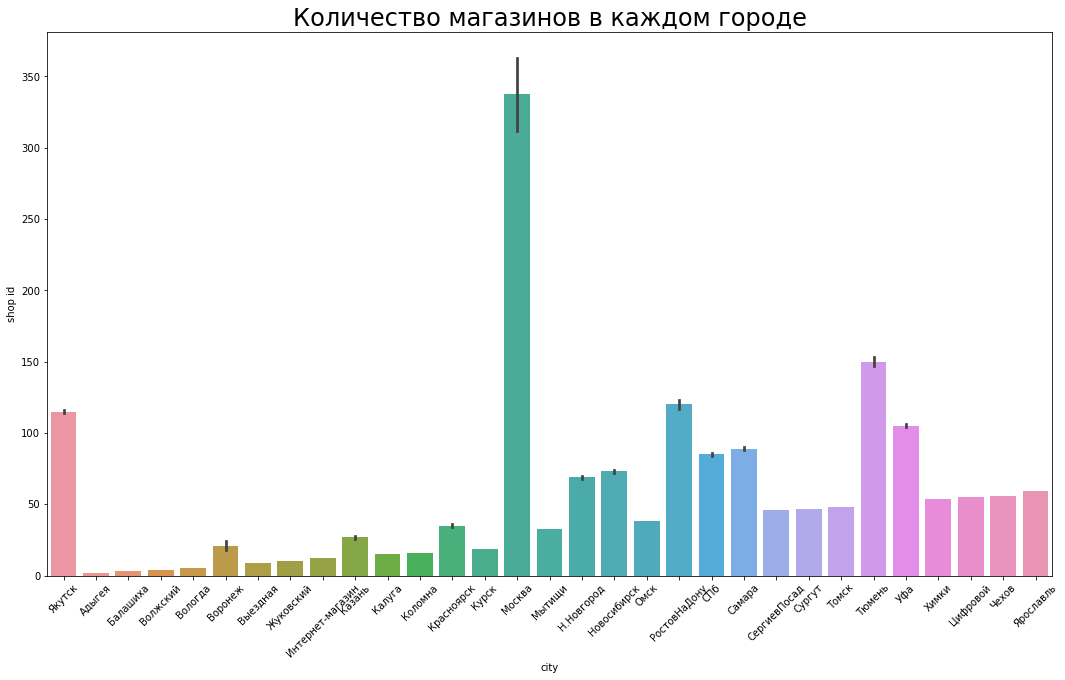

In [26]:
# График количества магазинов по городам
plt.figure(figsize = (18,10))
plt.title('Количество магазинов в каждом городе', fontsize=24)
ax = sns.barplot(x='city', y="shop_id", data=data_shops, estimator=np.sum)
ax = ax.set(xlabel='city', ylabel='shop id')
plt.xticks(rotation=45)
plt.show() 

Магазинов больше всего в Москве, так как это самый крупный город

По этой же логике меньше всего магазинов в таких городах, как Балашиха, Волжский, Вологда и республика Адыгея

sales_train.csv - обучающий набор. Ежедневные исторические данные с января 2013 г. по октябрь 2015 г.

In [204]:
data_sales_train=pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')

shop_id - уникальный идентификатор магазина

item_id - уникальный идентификатор товара

item_cnt_day - количество проданных товаров (прогноз ежемесячной суммы этой фичи)

item_price - текущая цена товара

date - дата в формате дд / мм / гггг

date_block_num - порядковый номер месяца, используемый для удобства. Январь 2013 - 0, февраль 2013 - 1, ..., октябрь 2015 - 33

In [205]:
data_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [206]:
data_sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [207]:
data_sales_train['date'] = pd.to_datetime(data_sales_train['date'])

In [208]:
# Временной интервал датасета
data_sales_train['date'] = pd.to_datetime(data_sales_train.date)
print('Min date from train set: %s' % data_sales_train['date'].min().date())
print('Max date from train set: %s' % data_sales_train['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2015-12-10


In [209]:
data_sales_train['shop_id'].nunique()

60

In [210]:
# Скоректировать столбец "shop_id" в обучающейся выборке также
data_sales_train.loc[data_sales_train['shop_id']==0, 'shop_id'] = 57
data_sales_train.loc[data_sales_train['shop_id']==1, 'shop_id'] = 58
data_sales_train.loc[data_sales_train['shop_id']==11, 'shop_id'] = 10

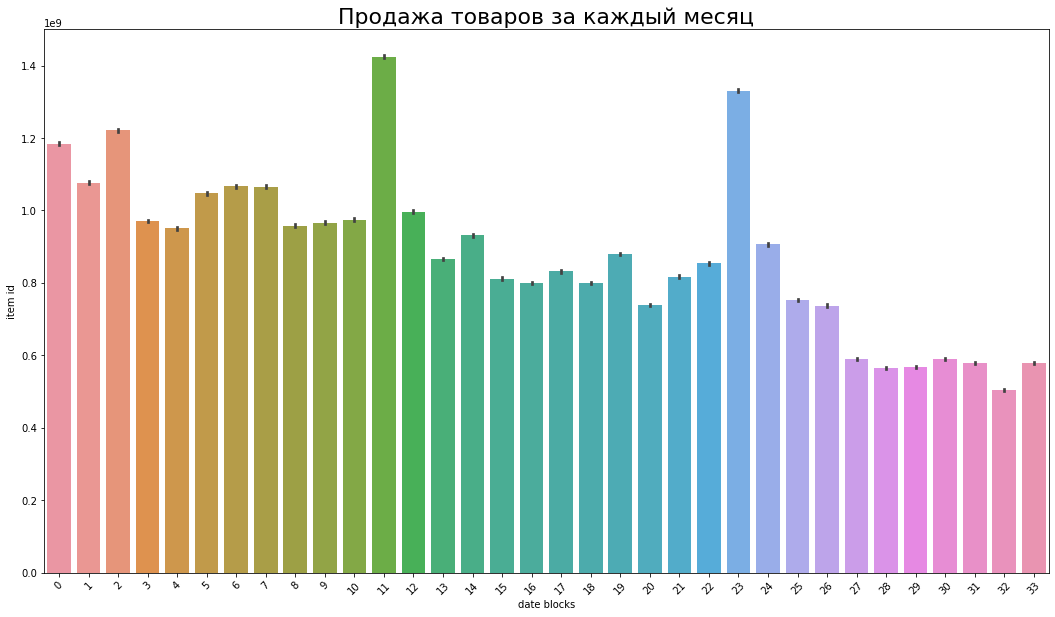

In [211]:
# График количества проданных товаров за каждый месяц
plt.figure(figsize = (18,10))
plt.title('Продажа товаров за каждый месяц', fontsize=22)
ax = sns.barplot(x='date_block_num', y="item_id", data=data_sales_train, estimator=np.sum)
ax = ax.set(xlabel='date blocks', ylabel='item id')
plt.xticks(rotation=45)
plt.show() 

Декабрь 2013 и 2014 показывает наилучшие показатели по продажам 

Также можно заметить , что за 2015 год снизились продажи

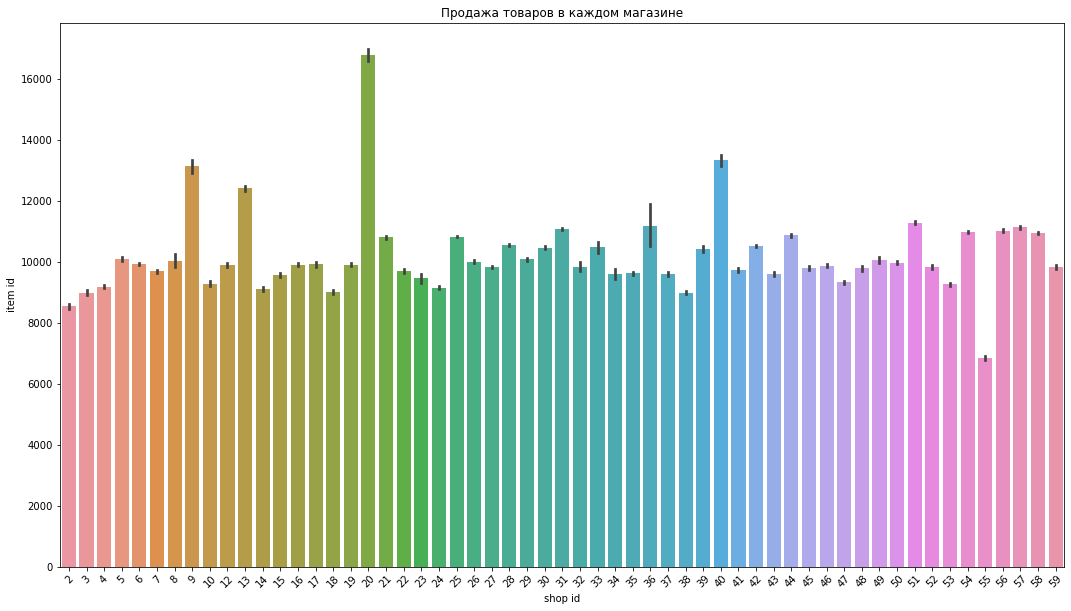

In [212]:
# График количества проданных товаров по каждому магазину
plt.figure(figsize = (18,10))
plt.title('Продажа товаров в каждом магазине')
ax = sns.barplot(x='shop_id', y="item_id", data=data_sales_train, estimator=np.mean)
ax = ax.set(xlabel='shop id', ylabel='item id')
plt.xticks(rotation=45)
plt.show() 

Среди всех магазинов лишь пара точек выбивается из общего списка про продажам товаров 

In [293]:
# Объединить data_sales_train и data_i по "item_id"
new_data = pd.merge(data_sales_train, data_i, how='left',on='item_id')

# Объединить new_data и data_i_cat по "item_category_id"
new_data = pd.merge(new_data, data_i_cat, how='left', on='item_category_id')

# Объединить new_data и data_shops по "shop_id"
new_data = pd.merge(new_data, data_shops, how='left',on='shop_id')

# Размер нового датасета
print(" Shape: ", new_data.shape)
print("  Size: ", new_data.size)

 Shape:  (2935849, 12)
  Size:  35230188


In [294]:
# Группировать данные по "date_block_num", "shop_id" и "item_id"
month = new_data.groupby(['date_block_num','shop_id','item_id']).agg({'item_price':'mean','item_cnt_day':'sum'}).reset_index()

In [295]:
# Объединить month c data_i, data_i_cat, data_shops
month = pd.merge(month,data_i,how='left',on='item_id')
month = pd.merge(month, data_i_cat,how='left',on='item_category_id')
month = pd.merge(month, data_shops, how='left',on='shop_id')

# Размер month
print(" Shape: ", month.shape)
print("  Size: ", month.size)

 Shape:  (1609124, 11)
  Size:  17700364


In [296]:
# Новый столбец "total_sales"
month['total_sales'] = month['item_price']*month['item_cnt_day']

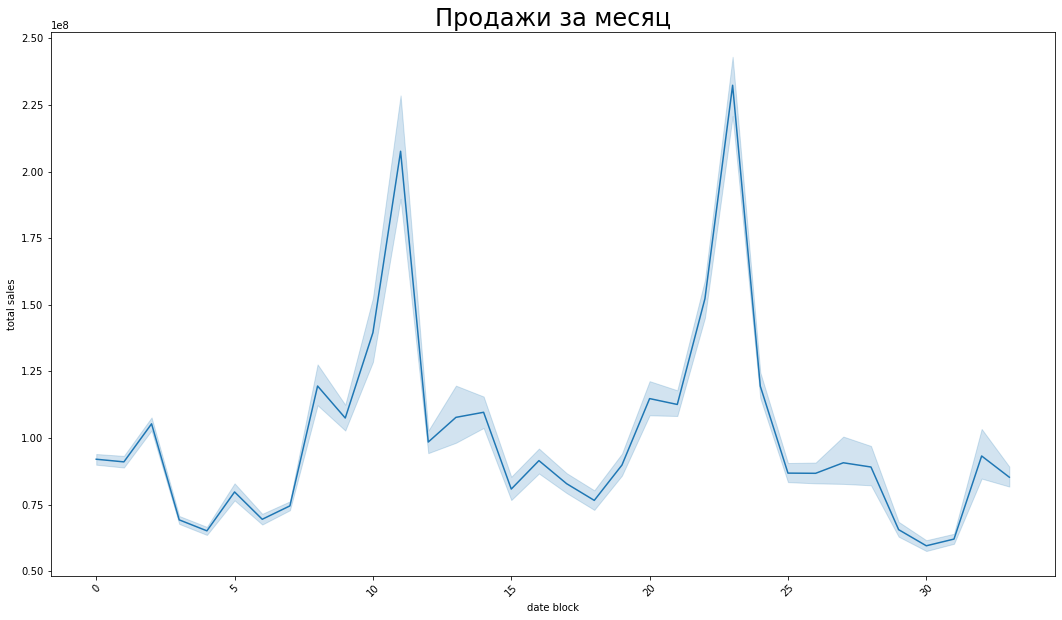

In [297]:
# График месячных продаж
plt.figure(figsize = (18,10))
plt.title('Продажи за месяц', fontsize=24)
ax = sns.lineplot(x='date_block_num', y='total_sales', data=month, estimator=np.sum)
ax = ax.set(xlabel='date block', ylabel='total sales')
plt.xticks(rotation=45)
plt.show() 

График месячных продаж также демонстрирует 2 пика под конец года, когда продажи сильно увеличились

In [298]:
# Новый столбец "month"
month['month']= month['date_block_num'].apply(lambda month: (month+1)%12)

In [299]:
month

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,category,item,shop_name,city,total_sales,month
0,0,2,27,2499.0,1.0,"007 Legends [PS3, русская версия]",19,Игры,PS3,"Адыгея ТЦ ""Мега""",Адыгея,2499.0,1
1,0,2,33,499.0,1.0,1+1 (BD),37,Кино,Blu,"Адыгея ТЦ ""Мега""",Адыгея,499.0,1
2,0,2,317,299.0,1.0,1С:Аудиокниги. Мединский В. Мифы о России. О р...,45,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,1
3,0,2,438,299.0,1.0,1С:Аудиотеатр. Лучшие произведения русских пис...,45,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,1
4,0,2,471,399.0,2.0,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,49,Книги,Методические материалы 1С,"Адыгея ТЦ ""Мега""",Адыгея,798.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,714.0,10
1609120,33,59,22088,119.0,2.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,238.0,10
1609121,33,59,22091,179.0,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,179.0,10
1609122,33,59,22100,629.0,1.0,Энциклопедия Adventure Time,42,Книги,"Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир""",Ярославль,629.0,10


In [300]:
month.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_sales,month
count,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06
mean,1.466479e+01,3.309265e+01,1.068099e+04,7.908847e+02,2.267200e+00,4.154192e+01,2.117969e+03,5.218319e+00
std,9.542322e+00,1.646698e+01,6.238883e+03,1.551605e+03,8.649882e+00,1.632365e+01,1.527264e+04,3.369199e+00
min,0.000000e+00,2.000000e+00,0.000000e+00,9.000000e-02,-2.200000e+01,0.000000e+00,-3.378700e+04,0.000000e+00
25%,6.000000e+00,2.100000e+01,5.045000e+03,1.990000e+02,1.000000e+00,3.000000e+01,2.490000e+02,2.000000e+00
50%,1.400000e+01,3.100000e+01,1.049700e+04,3.990000e+02,1.000000e+00,4.000000e+01,5.374833e+02,5.000000e+00
75%,2.300000e+01,4.800000e+01,1.606000e+04,8.985000e+02,2.000000e+00,5.500000e+01,1.490000e+03,8.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.253000e+03,8.300000e+01,6.212880e+06,1.100000e+01


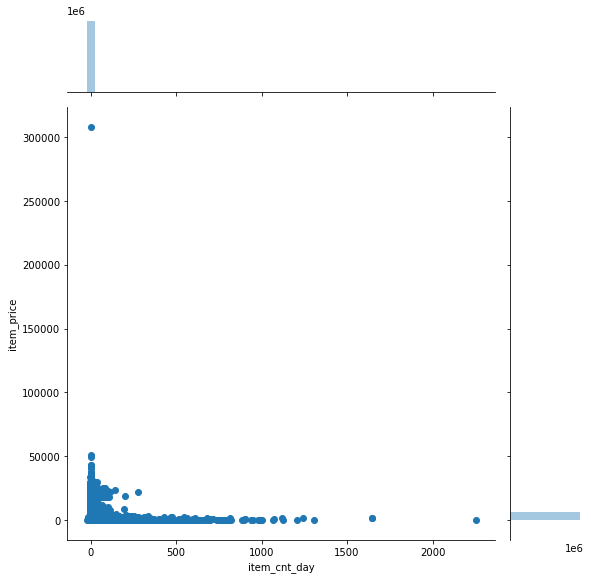

In [301]:
# Проверка выбросов
sns.jointplot(x="item_cnt_day", y="item_price", data=month, height=8)
plt.show()

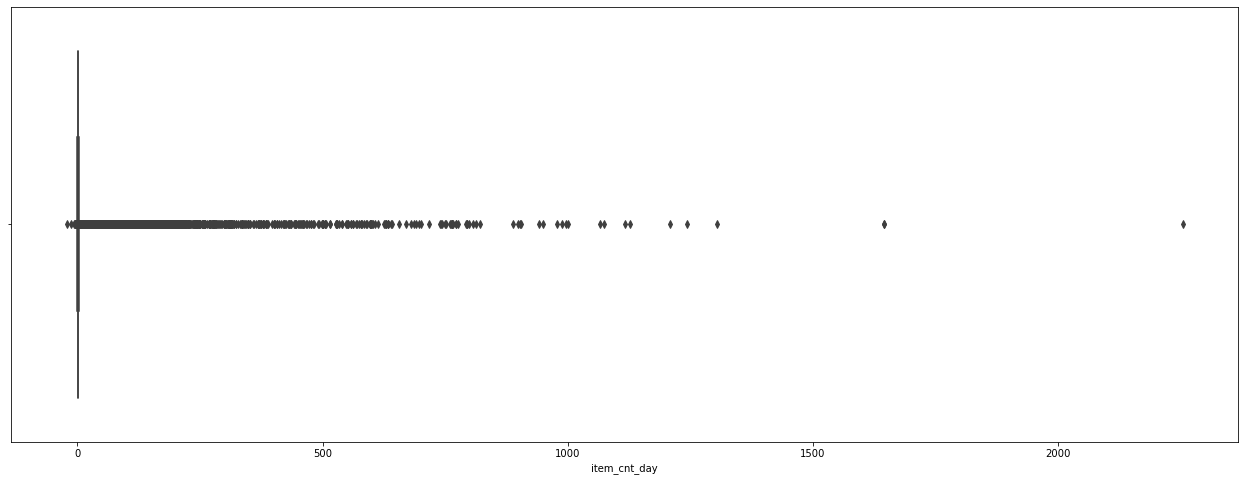

In [302]:
# Распределение "item_cnt_day" 
plt.subplots(figsize=(22, 8))
sns.boxplot(month['item_cnt_day'])
plt.show()

In [303]:
# Удаление выбросов
month = month.query('item_cnt_day >= 0 and item_cnt_day <= 2000 and item_price < 300000')

In [304]:
month

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,category,item,shop_name,city,total_sales,month
0,0,2,27,2499.0,1.0,"007 Legends [PS3, русская версия]",19,Игры,PS3,"Адыгея ТЦ ""Мега""",Адыгея,2499.0,1
1,0,2,33,499.0,1.0,1+1 (BD),37,Кино,Blu,"Адыгея ТЦ ""Мега""",Адыгея,499.0,1
2,0,2,317,299.0,1.0,1С:Аудиокниги. Мединский В. Мифы о России. О р...,45,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,1
3,0,2,438,299.0,1.0,1С:Аудиотеатр. Лучшие произведения русских пис...,45,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,1
4,0,2,471,399.0,2.0,1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,49,Книги,Методические материалы 1С,"Адыгея ТЦ ""Мега""",Адыгея,798.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,714.0,10
1609120,33,59,22088,119.0,2.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,238.0,10
1609121,33,59,22091,179.0,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,179.0,10
1609122,33,59,22100,629.0,1.0,Энциклопедия Adventure Time,42,Книги,"Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир""",Ярославль,629.0,10


In [305]:
month.drop(['item_name','item_category_id'], inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [306]:
from sklearn.preprocessing import LabelEncoder

In [307]:
# Converts the city names into numerical codes
month['city_code'] = LabelEncoder().fit_transform(month['city']) 

<ipython-input-307-9009d8635233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['city_code'] = LabelEncoder().fit_transform(month['city'])


In [308]:
# Converts the category and item names into numerical codes
month['category_code'] = LabelEncoder().fit_transform(month['category'])
month['item_code'] = LabelEncoder().fit_transform(month['item'])
#month['item_name_code'] = LabelEncoder().fit_transform(month['item_name'])

<ipython-input-308-0679181fec7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['category_code'] = LabelEncoder().fit_transform(month['category'])
<ipython-input-308-0679181fec7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['item_code'] = LabelEncoder().fit_transform(month['item'])


In [309]:
month

,date_block_num,shop_id,item_id,item_price,item_cnt_day,category,item,shop_name,city,total_sales,month,city_code,category_code,item_code
0,0,2,27,2499.0,1.0,Игры,PS3,"Адыгея ТЦ ""Мега""",Адыгея,2499.0,1,0,5,10
1,0,2,33,499.0,1.0,Кино,Blu,"Адыгея ТЦ ""Мега""",Адыгея,499.0,1,0,11,1
2,0,2,317,299.0,1.0,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,1,0,12,23
3,0,2,438,299.0,1.0,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,1,0,12,23
4,0,2,471,399.0,2.0,Книги,Методические материалы 1С,"Адыгея ТЦ ""Мега""",Адыгея,798.0,1,0,12,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,714.0,10,30,19,64
1609120,33,59,22088,119.0,2.0,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,238.0,10,30,19,64
1609121,33,59,22091,179.0,1.0,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,179.0,10,30,19,64
1609122,33,59,22100,629.0,1.0,Книги,"Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир""",Ярославль,629.0,10,30,12,19


In [310]:
# Преобразование категориальных переменных
month = pd.concat([month, pd.get_dummies(month['shop_id'],drop_first=True, prefix='shop_id')], axis=1)
month = pd.concat([month, pd.get_dummies(month['category'],drop_first=True, prefix='category')], axis=1)
month = pd.concat([month, pd.get_dummies(month['item'],drop_first=True, prefix='item')], axis=1)

In [311]:
# Получение названий признаков для 'shop_id', 'category' и 'item'

shop_col = [col for col in month.columns if 'shop_id_' in col]
category_col = [col for col in month.columns if 'category_' in col]
item_col = [ col for col in month.columns if 'item_' in col]

In [312]:
# Определение признаков и таргета
features = ['month', 'shop_id','item_id', 'item_price'] + category_col + item_col
target = ['item_cnt_day']

In [313]:
month

,date_block_num,shop_id,item_id,item_price,item_cnt_day,category,item,shop_name,city,total_sales,...,item_Стандартные издания,item_Сувениры,item_Сувениры (в навеску),"item_Сумки, Альбомы, Коврики д/мыши",item_Фигурки,item_Художественная литература,item_Цифра,item_Чистые носители (шпиль),item_Чистые носители (штучные),item_Элементы питания
0,0,2,27,2499.0,1.0,Игры,PS3,"Адыгея ТЦ ""Мега""",Адыгея,2499.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,33,499.0,1.0,Кино,Blu,"Адыгея ТЦ ""Мега""",Адыгея,499.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,317,299.0,1.0,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,438,299.0,1.0,Книги,Аудиокниги 1С,"Адыгея ТЦ ""Мега""",Адыгея,299.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,471,399.0,2.0,Книги,Методические материалы 1С,"Адыгея ТЦ ""Мега""",Адыгея,798.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,714.0,...,0,0,0,0,0,0,0,0,0,1
1609120,33,59,22088,119.0,2.0,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,238.0,...,0,0,0,0,0,0,0,0,0,1
1609121,33,59,22091,179.0,1.0,Элементы питания,Элементы питания,"Ярославль ТЦ ""Альтаир""",Ярославль,179.0,...,0,0,0,0,0,0,0,0,0,1
1609122,33,59,22100,629.0,1.0,Книги,"Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир""",Ярославль,629.0,...,0,0,0,0,0,0,0,0,0,0


test.csv - набор тестов

Необходимо спрогнозировать продажи этих магазинов и товаров на ноябрь 2015 года.

In [238]:
data_test=pd.read_csv('competitive-data-science-predict-future-sales/test.csv')

ID - идентификатор, представляющий кортеж (магазин, товар) в тестовом наборе

shop_id - уникальный идентификатор магазина

item_id - уникальный идентификатор товара

In [239]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [240]:
# Добавление "date_block_num" и "month" столбцов
data_test['date_block_num'] = 34
data_test['month'] = 11

In [241]:
item_price = month[['item_id', 'item_price']].groupby('item_id')['item_price'].mean().reset_index()

In [242]:
# Объединение data_test с item_price, data_i, data_i_cat и data_shops

data_test = pd.merge(data_test, item_price,how='left',on='item_id')
data_test = pd.merge(data_test, data_i ,how='left',on='item_id') 
data_test = pd.merge(data_test, data_i_cat ,how='left',on='item_category_id')
data_test = pd.merge(data_test, data_shops ,how='left',on='shop_id')

In [243]:
# Преобразование категориальных признаков

data_test = pd.concat([data_test, pd.get_dummies(data_test['shop_id'], drop_first=True, prefix='shop_id')], axis=1)
data_test = pd.concat([data_test, pd.get_dummies(data_test['category'], drop_first=True, prefix='category')], axis=1)
data_test = pd.concat([data_test, pd.get_dummies(data_test['item'], drop_first=True, prefix='item')], axis=1)

In [244]:
data_test

,ID,shop_id,item_id,date_block_num,month,item_price,item_name,item_category_id,category,item,...,item_Подарочные издания,item_Развитие,item_Служебные,item_Стандартные издания,item_Сувениры,item_Сувениры (в навеску),"item_Сумки, Альбомы, Коврики д/мыши",item_Фигурки,item_Цифра,item_Элементы питания
0,0,5,5037,34,11,1960.633112,"NHL 15 [PS3, русские субтитры]",19,Игры,PS3,...,0,0,0,0,0,0,0,0,0,0
1,1,5,5320,34,11,NaN,ONE DIRECTION Made In The A.M.,55,Музыка,CD локального производства,...,0,0,0,0,0,0,0,0,0,0
2,2,5,5233,34,11,844.516003,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры,PS3,...,0,0,0,0,0,0,0,0,0,0
3,3,5,5232,34,11,792.527697,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры,XBOX 360,...,0,0,0,0,0,0,0,0,0,0
4,4,5,5268,34,11,NaN,"Need for Speed [PS4, русская версия]",20,Игры,PS4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,34,11,180.699928,СБ. Союз 55,55,Музыка,CD локального производства,...,0,0,0,0,0,0,0,0,0,0
214196,214196,45,16188,34,11,1256.975000,Настольная игра Нано Кёрлинг,64,Подарки,Настольные игры,...,0,0,0,0,0,0,0,0,0,0
214197,214197,45,15757,34,11,198.336478,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка,CD локального производства,...,0,0,0,0,0,0,0,0,0,0
214198,214198,45,19648,34,11,97.865116,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино,DVD,...,0,0,0,0,0,0,0,0,0,0


In [245]:
# Названия признаков

data_test_shop_col = [col for col in data_test.columns if 'shop_id_' in col]
data_test_category_col = [col for col in data_test.columns if 'category_' in col]
data_test_item_col = [col for col in data_test.columns if 'item_' in col]

In [246]:
data_test.isnull().sum()

ID                                     0
shop_id                                0
item_id                                0
date_block_num                         0
month                                  0
                                      ..
item_Сувениры (в навеску)              0
item_Сумки, Альбомы, Коврики д/мыши    0
item_Фигурки                           0
item_Цифра                             0
item_Элементы питания                  0
Length: 116, dtype: int64

In [247]:
data_test['item_price'].fillna(0, inplace=True)

In [252]:
data_test

,ID,shop_id,item_id,date_block_num,month,item_price,item_name,item_category_id,category,item,...,item_Подарочные издания,item_Развитие,item_Служебные,item_Стандартные издания,item_Сувениры,item_Сувениры (в навеску),"item_Сумки, Альбомы, Коврики д/мыши",item_Фигурки,item_Цифра,item_Элементы питания
0,0,5,5037,34,11,1960.633112,"NHL 15 [PS3, русские субтитры]",19,Игры,PS3,...,0,0,0,0,0,0,0,0,0,0
1,1,5,5320,34,11,0.000000,ONE DIRECTION Made In The A.M.,55,Музыка,CD локального производства,...,0,0,0,0,0,0,0,0,0,0
2,2,5,5233,34,11,844.516003,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры,PS3,...,0,0,0,0,0,0,0,0,0,0
3,3,5,5232,34,11,792.527697,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры,XBOX 360,...,0,0,0,0,0,0,0,0,0,0
4,4,5,5268,34,11,0.000000,"Need for Speed [PS4, русская версия]",20,Игры,PS4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,34,11,180.699928,СБ. Союз 55,55,Музыка,CD локального производства,...,0,0,0,0,0,0,0,0,0,0
214196,214196,45,16188,34,11,1256.975000,Настольная игра Нано Кёрлинг,64,Подарки,Настольные игры,...,0,0,0,0,0,0,0,0,0,0
214197,214197,45,15757,34,11,198.336478,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка,CD локального производства,...,0,0,0,0,0,0,0,0,0,0
214198,214198,45,19648,34,11,97.865116,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино,DVD,...,0,0,0,0,0,0,0,0,0,0


In [143]:
#data_test.drop(['item_name'], inplace=True, axis=1)

In [248]:
# Признаки для data_test 
data_test_features = ['month', 'item_id' + 'shop_id', 'item_price'] + data_test_category_col + data_test_item_col

In [318]:
# Общее количество признаков
common_features = list(set(features) & set(data_test_features)) 
print(f"Общее количество признаков: {len(common_features)}")

Общее количество признаков: 66


Model 0

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [314]:
# Разбитие на test и train данные 
X_feature = month[features].fillna(value=0)
Y_target = month[target].fillna(value=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size=0.3, random_state=0)

In [316]:
# Обучение линейной регрессии
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [317]:
lr.score(X_test,Y_test)

1.0

Model 0.2

In [260]:
# Разбитие на test и train данные 
X = month[common_features].fillna(value=0)
y = month[target].fillna(value=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [253]:
# Обучение линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [254]:
lr.score(X_test, y_test)

0.2558921376898229